In [72]:
import pandas as pd

In [73]:
data = pd.read_csv(r"C:\Users\Maria Paula\OneDrive\Documents\GitHub\airemty\base_final_imputada_por_zona.csv")
df = pd.DataFrame(data)

In [74]:
df.dtypes

Zona      object
date      object
SO2      float64
RAINF    float64
WSR      float64
WDR      float64
dtype: object

In [75]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year #extraigo el año

In [76]:
df_agrupado = df.groupby(["Zona", "year"])

In [77]:
df_estadisticas = (
    df_agrupado['SO2']
    .agg(['mean', 'median', 'std', 'min', 'max'])
    .reset_index()
)

# Si quieres valores absolutos de la media (opcional)
df_estadisticas['mean'] = df_estadisticas['mean'].abs()
df_estadisticas['median'] = df_estadisticas['median'].abs()
df_estadisticas['std'] = df_estadisticas['std'].abs()
df_estadisticas['min'] = df_estadisticas['min'].abs()

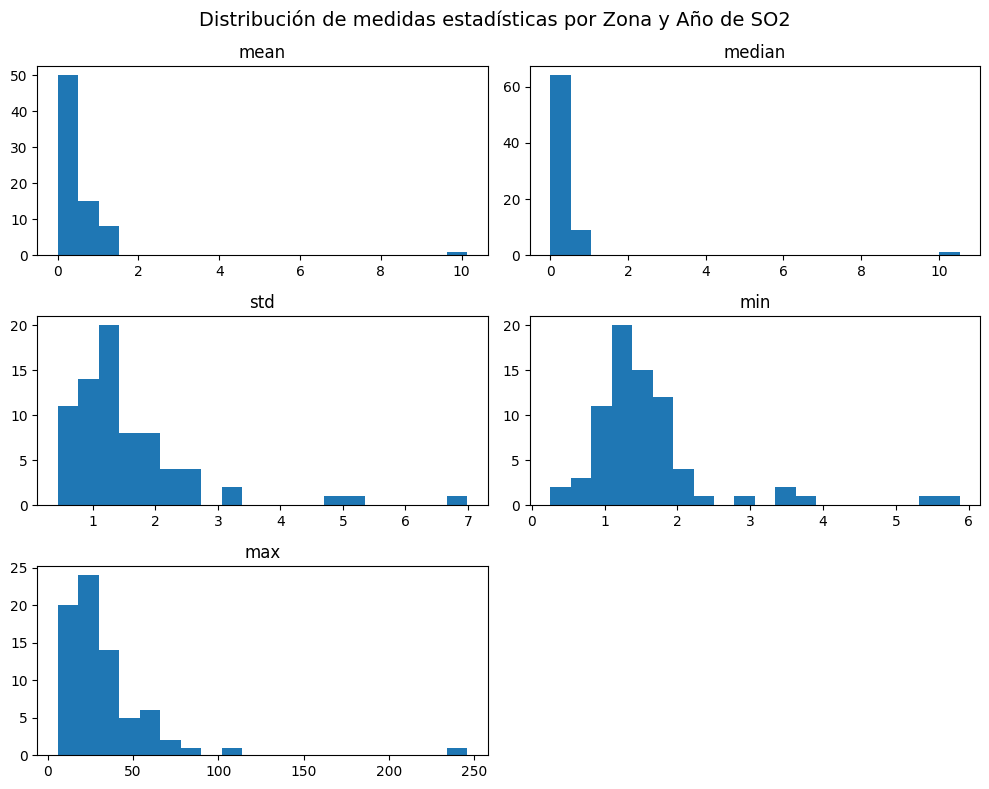

In [78]:
import matplotlib.pyplot as plt

df_estadisticas[['mean', 'median', 'std', 'min', 'max']].hist(
    bins=20,
    figsize=(10, 8),
    grid=False
)

plt.suptitle("Distribución de medidas estadísticas por Zona y Año de SO2", fontsize=14)
plt.tight_layout()
plt.show()

In [89]:
df_estadisticas

,Zona,year,mean,median,std,min,max
0,Centro,2021,0.308922,0.117956,1.149753,1.297517,22.765520
1,Centro,2022,0.739111,0.589780,1.112998,1.140242,27.483763
2,Centro,2023,0.149278,0.353868,0.739649,1.376154,8.414199
3,Centro,2024,0.093325,0.117956,0.897633,1.297517,31.238697
4,Centro,2025,0.456545,0.314550,1.362155,1.061605,32.162686
...,...,...,...,...,...,...,...
69,Suroeste2,2021,0.350156,0.000000,1.260272,1.882353,27.000000
70,Suroeste2,2022,0.888844,0.470588,1.579311,0.941176,47.117647
71,Suroeste2,2023,0.195789,0.117647,1.117859,1.882353,19.058824
72,Suroeste2,2024,0.042247,0.176471,1.262843,1.529412,21.470588


In [90]:
from tslearn.metrics import cdist_dtw
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

FEATURES = ['mean', 'median', 'std', 'min', 'max']

dfs_por_anio = {}
for y in sorted(df_estadisticas['year'].unique()):
    sub = (
        df_estadisticas.loc[df_estadisticas['year'] == y, ['Zona', 'year'] + FEATURES]
        .drop_duplicates(subset=['Zona'])        # por si hay repetidas
        .set_index('Zona')                       # etiquetas del dendrograma
    )
    # Quédate con columnas numéricas (por si se coló algo)
    sub_num = sub.select_dtypes(include='number')
    dfs_por_anio[y] = sub_num
    
df_2022 = dfs_por_anio[2022].select_dtypes(include='number')
df_2021 = dfs_por_anio[2021].select_dtypes(include='number')
df_2023 = dfs_por_anio[2023].select_dtypes(include='number')
df_2024 = dfs_por_anio[2024].select_dtypes(include='number')
df_2025 = dfs_por_anio[2025].select_dtypes(include='number')


In [91]:
df_2023

,year,mean,median,std,min,max
Zona,,,,,,
Centro,2023,0.149278,0.353868,0.739649,1.376154,8.414199
Noreste,2023,0.163234,0.450000,1.391793,1.150000,53.850000
Noreste2,2023,0.004462,0.303030,1.046605,1.030303,22.030303
Noreste3,2023,0.036020,0.505642,2.160706,3.044744,64.300746
Noroeste,2023,0.223541,0.407407,0.822799,1.555556,19.481481
Noroeste2,2023,0.427484,0.532175,0.507249,1.689588,8.514804
Noroeste3,2023,0.216808,0.111111,1.779877,1.833333,34.944444
Norte,2023,0.295423,0.363697,1.283740,2.000000,34.562500
Norte2,2023,0.005602,0.300171,1.104299,1.260750,30.026708


C:\Users\Maria Paula\AppData\Local\Temp\ipykernel_14284\1396213984.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, method='ward')


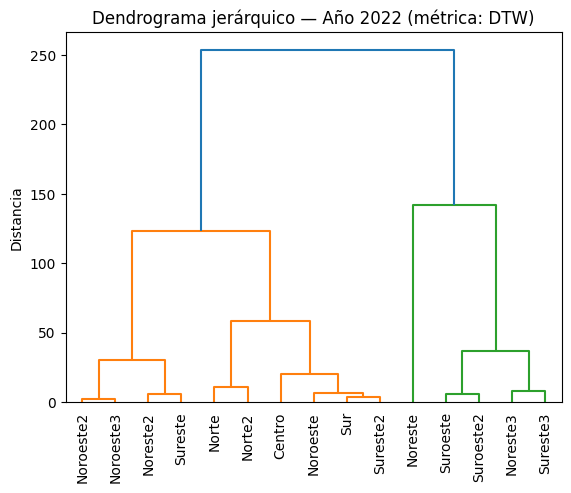

In [95]:
# Matriz de distancias DTW
dist_matrix = cdist_dtw(df_2022)

# Clustering jerárquico
Z = linkage(dist_matrix, method='ward')

dendrogram(Z, labels=df_2022.index.tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma jerárquico — Año 2022 (métrica: DTW)")
plt.ylabel("Distancia")
plt.show()